width_squared_datax_cm: [3.49462226e-05 4.23761276e-05 5.61920570e-05 7.47057578e-05
 1.05695389e-04 1.51294128e-04 1.82220013e-04 3.76865369e-05
 4.37101528e-05 6.13839892e-05 9.03750544e-05 1.19672073e-04
 1.56479707e-04 2.37343369e-04 4.56131159e-04 7.82543013e-04
 1.12452250e-03 1.53565236e-03 2.87037119e-04 5.80607509e-04
 8.99170163e-04 1.30738563e-03 1.79615884e-03]
width_squared_datax_cm_mean: 0.00044188212512134785
width_squared_datax_cm_sig: 0.0005235790462611938
x Fitting Results:
W0_x (Beam Waist Radius/cm): 0.007156375048006942
z0_x (Beam Waist Position/cm): 18.829336850544056
M_squaredx: 2.4925051359962564
x Calculated Rayleigh distance and Theta:
zR0_x (Rayleigh Length/cm): 2.5425505010799623
zRM_x (Rayleigh Length/cm): 1.020078339803983
Theta0_x (radians): 0.0028146442105937454
ThetaM_x (radians): 0.007015515150907039
x parameters before lens:
W0_1x (Beam Waist Radius before lens/cm): 0.038070784073544854
z0_1x (Beam Waist Position before lens/cm): 96.07226489832455
zRM

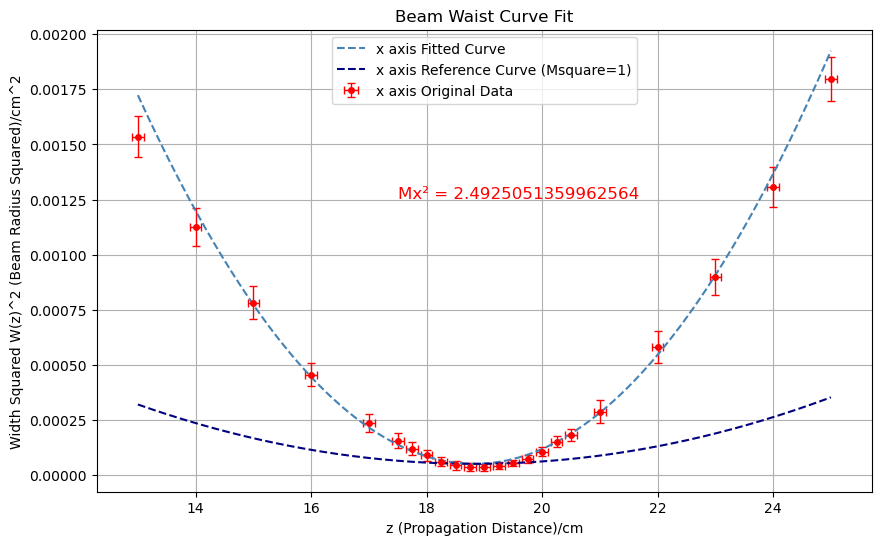

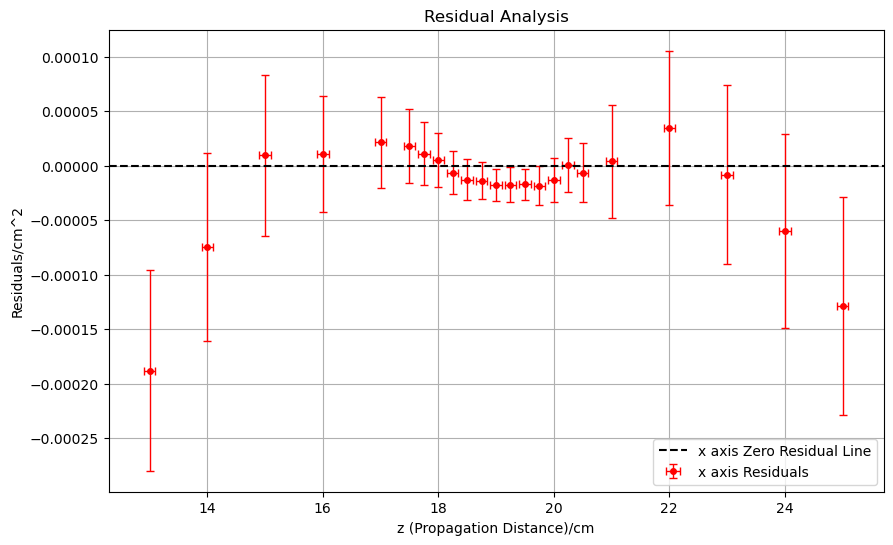

width_squared_datay_cm: [3.64029770e-05 4.37415768e-05 5.71152797e-05 7.62708903e-05
 9.93979268e-05 1.49551986e-04 1.60126953e-04 3.57185232e-05
 4.27699686e-05 5.63497040e-05 7.50115140e-05 1.02888729e-04
 1.41185865e-04 2.16359591e-04 4.74660626e-04 7.80248597e-04
 1.15398142e-03 1.51279733e-03 2.79319933e-04 5.07531086e-04
 8.49772052e-04 1.27695704e-03 1.70462040e-03]
width_squared_datay_cm_mean: 0.00042751217231769566
width_squared_datay_cm_sig: 0.0005109325953449856
y Fitting Results:
W0_y (Beam Waist Radius/cm): 0.006680991503643045
z0_y (Beam Waist Position/cm): 18.89868969788874
M_squaredy: 2.3020333125146335
y Calculated Rayleigh distance and Theta:
zR0_y (Rayleigh Length/cm): 2.2159769624759065
zRM_y (Rayleigh Length/cm): 0.9626172438205409
Theta0_y (radians): 0.0030149192057386674
ThetaM_y (radians): 0.006940444446150573
y parameters before lens:
W0_1y (Beam Waist Radius before lens/cm): 0.03499794674509421
z0_1y (Beam Waist Position before lens/cm): 95.54355925860042
zRM_

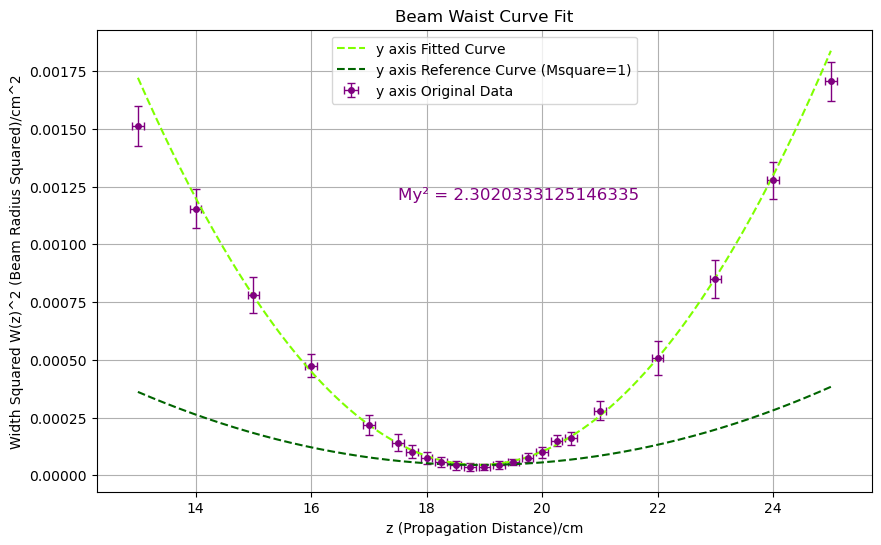

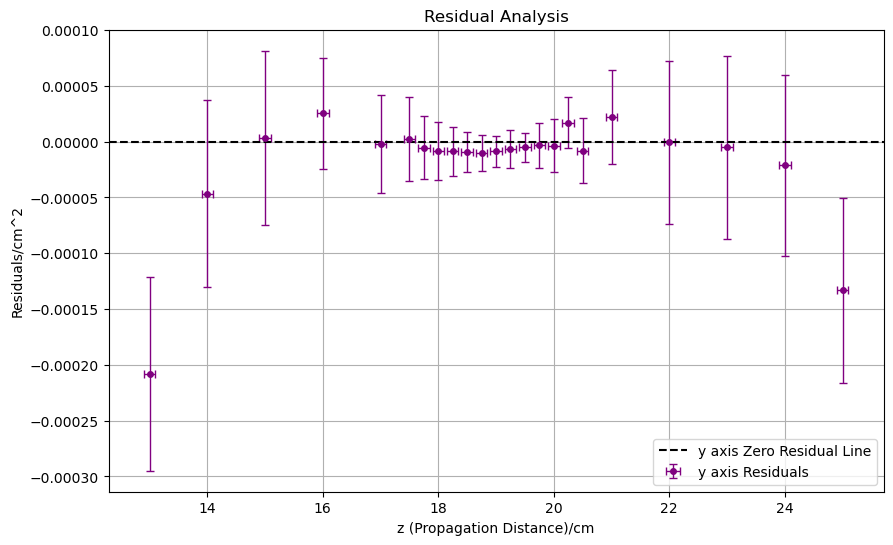

In [4]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 定义拟合公式
def beam_waist_curve(z, W0, z0, M_squared):
    """
    光束传播公式的平方形式：
    W(z)^2 = W0^2 * (1 + M_squared**2 *((z - z0)^2) / (np.pi * W0_fit**2 / 632.8e-07)^2)
    
    Parameters:
        z  : Propagation distance
        W0 : Beam waist radius
        z0 : Beam waist position
        zR0 : Rayleigh length=pai*w0^2/lamda
        M_squared
    Returns:
        Beam width radius squared W(z)^2 at propagation distance z
    """
    return W0**2 * (1 + (M_squared**2)*((z - z0)**2) / ((np.pi * W0**2 / 632.8e-07)**2))#z-cm z0-cm W0-cm W0-cm^2 lamda-632.8e-07cm

# 测量数据 (z, W(z)^2)

data_array = [
(1.90000000e+01, 2.93665736e+02, 3.05907370e+02),
(1.92500000e+01, 3.56101913e+02, 3.67576276e+02),
(1.95000000e+01, 4.72202160e+02, 4.79960334e+02),
(1.97500000e+01, 6.27779477e+02, 6.40931851e+02),
(2.00000000e+01, 8.88196547e+02, 8.35276696e+02),
(2.02500000e+01, 1.27137923e+03, 1.25673938e+03),
(2.05000000e+01, 1.53126061e+03, 1.34560465e+03),
(1.87500000e+01, 3.16693587e+02, 3.00155657e+02),
(1.85000000e+01, 3.67312208e+02, 3.59411501e+02),
(1.82500000e+01, 5.15831842e+02, 4.73526924e+02),
(1.80000000e+01, 7.59454239e+02, 6.30348857e+02),
(1.77500000e+01, 1.00564767e+03, 8.64611167e+02),
(1.75000000e+01, 1.31495552e+03, 1.18643584e+03),
(1.70000000e+01, 1.99448209e+03, 1.81814782e+03),
(1.60000000e+01, 3.83303495e+03, 3.98874476e+03),
(1.50000000e+01, 6.57599171e+03, 6.55671090e+03),
(1.40000000e+01, 9.44976888e+03, 9.69732282e+03),
(1.30000000e+01, 1.29046417e+04, 1.27125826e+04),
(2.10000000e+01, 2.41207663e+03, 2.34722633e+03),
(2.20000000e+01, 4.87905470e+03, 4.26496711e+03),
(2.30000000e+01, 7.55605179e+03, 7.14094161e+03),
(2.40000000e+01, 1.09864339e+04, 1.07307314e+04),
(2.50000000e+01, 1.50937718e+04, 1.43245412e+04),
#LG01
]#cm-像素平方



z_width_squared_data = data_array
# 转换为 NumPy 数组
z_data, width_squared_datax, width_squared_datay = zip(*z_width_squared_data) #cm-像素平方
z_data = np.array(z_data) #cm
width_squared_datax= np.array(width_squared_datax) * 11.9e-08 #cm^2 
width_squared_datay= np.array(width_squared_datay) * 11.9e-08 #cm^2 
print("width_squared_datax_cm:",width_squared_datax)
#x axis
# 初步估计初始参数 (W0, z0)
W0_initialx = np.sqrt(min(width_squared_datax))  # Take the square root of the minimum W^2
z0_initialx = z_data[np.argmin(width_squared_datax)]  # The z value corresponding to the minimum W
M_squared_initialx = 1
initial_guessx = [W0_initialx, z0_initialx, M_squared_initialx]


# 定义权重，权重与测量值成反比
# 如果测量误差未知，这里假设权重为 1 / width_squared
#weights = 1/(width_squared_datax**1)
# 如果测量误差未知，这里假设权重为 width_squared
#weights = 1/width_squared_datax**2

mu = np.mean(width_squared_datax)  # 取均值作为中心
sig = np.std(width_squared_datax)  # 取标准差决定宽度
print("width_squared_datax_cm_mean:",mu)
print("width_squared_datax_cm_sig:",sig)
weights = np.exp(-((width_squared_datax - 1*mu) ** 2) / (2 * sig ** 2)) #============================================================================= XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# 进行非线性加权最小二乘法拟合
poptx, pcovx = curve_fit(
    beam_waist_curve,
    z_data,
    width_squared_datax,
    p0=initial_guessx,
    sigma=1/weights  # 设置权重
)

# 获取拟合参数
W0_fitx, z0_fitx, M_squaredx = poptx
print("x Fitting Results:")
print(f"W0_x (Beam Waist Radius/cm): {W0_fitx}")  # Fitted beam waist radius W0
print(f"z0_x (Beam Waist Position/cm): {z0_fitx}")
print(f"M_squaredx: {M_squaredx}")

print("x Calculated Rayleigh distance and Theta:")
zR0x=(np.pi * W0_fitx**2 / 632.8e-07)#cm
print(f"zR0_x (Rayleigh Length/cm): {zR0x}")
zRMx=zR0x/M_squaredx#cm
print(f"zRM_x (Rayleigh Length/cm): {zRMx}")
theta0_radx=(632.8e-07/(np.pi * W0_fitx) )#radians
print(f"Theta0_x (radians): {theta0_radx}")
thetaM_radx=M_squaredx * theta0_radx#radians
print(f"ThetaM_x (radians): {thetaM_radx}")

# 透镜前原光束参数
print("x parameters before lens:")
f=16#cm,焦距
T=f**2/((z0_fitx-f)**2+zRMx**2)#转换系数
W0_1x=(T**(1/2))*W0_fitx#cm
print(f"W0_1x (Beam Waist Radius before lens/cm): {W0_1x}")
z0_1x=f+T*(z0_fitx-f)
print(f"z0_1x (Beam Waist Position before lens/cm): {z0_1x}")
zRM_1x=T*(zRMx)
print(f"zRM_1x (Rayleigh Length before lens/cm): {zRM_1x}")
M_squared_1x=(np.pi * W0_1x**2)/(zRM_1x*632.8e-07)
print(f"M_squared_1x: {M_squared_1x}")
thetaM_rad_1x=M_squared_1x *(632.8e-07/(np.pi * W0_1x) )#radians
print(f"ThetaM_1x before lens/radians: {thetaM_rad_1x}")

# 生成拟合曲线
z_fit = np.linspace(min(z_data), max(z_data), 500)
width_squared_fitx = beam_waist_curve(z_fit, W0_fitx, z0_fitx, M_squaredx)
width_squared_fit0x = beam_waist_curve(z_fit, W0_fitx, z0_fitx, M_squared=1)

error_band_width_squaredx = np.array([
    0.000015, 0.000016, 0.000014, 0.000018, 0.00002, 0.000025, 0.000027,
    0.000017, 0.000019, 0.00002, 0.000025, 0.000029, 0.000034, 0.000042, 0.000053, 0.000074, 0.000086, 0.000092,
    0.000052, 0.000071, 0.000082, 0.000089, 0.0001
])  # W(z)^2 误差
error_band_z = np.array([0.1] * len(z_data))    # z 轴误差


plt.figure(figsize=(10, 6))
#plt.scatter(z_data, width_squared_datax, label="x axis Original Data", color="red")
plt.errorbar(z_data, width_squared_datax, 
             xerr=error_band_z, yerr=error_band_width_squaredx, 
             fmt='o', color="red", label="x axis Original Data", capsize=3, capthick=1, elinewidth=1, markersize=4)
plt.plot(z_fit, width_squared_fitx, label="x axis Fitted Curve", linestyle="--", color="steelblue")
plt.plot(z_fit, width_squared_fit0x, label="x axis Reference Curve (Msquare=1)", linestyle="--", color="navy")
plt.xlabel("z (Propagation Distance)/cm")
plt.ylabel("Width Squared W(z)^2 (Beam Radius Squared)/cm^2")
plt.title("Beam Waist Curve Fit")
plt.legend()
plt.grid()
plt.text(0.7 * max(z_data), 0.7 * max(width_squared_datax), f"Mx² = {M_squaredx}", fontsize=12, color="red")
plt.show()

# 残差分析
residuals_x = width_squared_datax - beam_waist_curve(z_data, *poptx)
plt.figure(figsize=(10, 6))
#plt.scatter(z_data, residuals_x, color="red", label="Residuals")
plt.errorbar(z_data, residuals_x, 
             xerr=error_band_z, yerr=error_band_width_squaredx, 
             fmt='o', color="red", label="x axis Residuals", capsize=3, capthick=1, elinewidth=1, markersize=4)
plt.axhline(0, color="black", linestyle="--", label="x axis Zero Residual Line")
plt.xlabel("z (Propagation Distance)/cm")
plt.ylabel("Residuals/cm^2")
plt.title("Residual Analysis")
plt.legend()
plt.grid()
plt.show()

#y axis
print("width_squared_datay_cm:",width_squared_datay)
# 初步估计初始参数 (W0, z0)
W0_initialy = np.sqrt(min(width_squared_datay))  # Take the square root of the minimum W^2
z0_initialy = z_data[np.argmin(width_squared_datay)]  # The z value corresponding to the minimum W
M_squared_initialy = 1
initial_guessy = [W0_initialy, z0_initialy, M_squared_initialy]

# 定义权重，权重与测量值成反比
# 如果测量误差未知，这里假设权重为 1 / width_squared
#weights = 1/(width_squared_datay**1.3)
# 如果测量误差未知，这里假设权重为 width_squared
#weights = 1/width_squared_datay**2
#高斯权重
mu = np.mean(width_squared_datay)  # 中心最高值
sig = np.std(width_squared_datay)  # 宽度
print("width_squared_datay_cm_mean:",mu)
print("width_squared_datay_cm_sig:",sig)
weights = np.exp(-((width_squared_datay - 1*mu) ** 2) / (2 * sig ** 2))
# 进行非线性加权最小二乘法拟合
popty, pcovy = curve_fit(
    beam_waist_curve,
    z_data,
    width_squared_datay,
    p0=initial_guessy,
    sigma=1/weights  # 设置权重
)

# 获取拟合参数
W0_fity, z0_fity, M_squaredy = popty
print("y Fitting Results:")
print(f"W0_y (Beam Waist Radius/cm): {W0_fity}")  # Fitted beam waist radius W0
print(f"z0_y (Beam Waist Position/cm): {z0_fity}")
print(f"M_squaredy: {M_squaredy}")
print("y Calculated Rayleigh distance and Theta:")
zR0y=(np.pi * W0_fity**2 / 632.8e-07)#cm
print(f"zR0_y (Rayleigh Length/cm): {zR0y}")
zRMy=zR0y/M_squaredy#cm
print(f"zRM_y (Rayleigh Length/cm): {zRMy}")
theta0_rady=(632.8e-07/(np.pi * W0_fity) )#radians
print(f"Theta0_y (radians): {theta0_rady}")
thetaM_rady=M_squaredy * theta0_rady#radians
print(f"ThetaM_y (radians): {thetaM_rady}")

# 透镜前原光束参数
print("y parameters before lens:")
f=16#cm,焦距
T=f**2/((z0_fity-f)**2+zRMy**2)#转换系数
W0_1y=(T**(1/2))*W0_fity#cm
print(f"W0_1y (Beam Waist Radius before lens/cm): {W0_1y}")
z0_1y=f+T*(z0_fity-f)
print(f"z0_1y (Beam Waist Position before lens/cm): {z0_1y}")
zRM_1y=T*(zRMy)
print(f"zRM_1y (Rayleigh Length before lens/cm): {zRM_1y}")
M_squared_1y=(np.pi * W0_1y**2)/(zRM_1y*632.8e-07)
print(f"M_squared_1y: {M_squared_1y}")
thetaM_rad_1y=M_squared_1y *(632.8e-07/(np.pi * W0_1y) )#radians
print(f"ThetaM_1y before lens/radians: {thetaM_rad_1y}")

# 生成拟合曲线
width_squared_fity = beam_waist_curve(z_fit, W0_fity, z0_fity, M_squaredy)
width_squared_fit0y = beam_waist_curve(z_fit, W0_fity, z0_fity, M_squared=1)

# 误差数据
"""
data_array = [
(1.90000000e+01, 2.93665736e+02, 3.05907370e+02),
(1.92500000e+01, 3.56101913e+02, 3.67576276e+02),
(1.95000000e+01, 4.72202160e+02, 4.79960334e+02),
(1.97500000e+01, 6.27779477e+02, 6.40931851e+02),
(2.00000000e+01, 8.88196547e+02, 8.35276696e+02),
(2.02500000e+01, 1.27137923e+03, 1.25673938e+03),
(2.05000000e+01, 1.53126061e+03, 1.34560465e+03),

(1.87500000e+01, 3.16693587e+02, 3.00155657e+02),
(1.85000000e+01, 3.67312208e+02, 3.59411501e+02),
(1.82500000e+01, 5.15831842e+02, 4.73526924e+02),
(1.80000000e+01, 7.59454239e+02, 6.30348857e+02),
(1.77500000e+01, 1.00564767e+03, 8.64611167e+02),
(1.75000000e+01, 1.31495552e+03, 1.18643584e+03),
(1.70000000e+01, 1.99448209e+03, 1.81814782e+03),
(1.60000000e+01, 3.83303495e+03, 3.98874476e+03),
(1.50000000e+01, 6.57599171e+03, 6.55671090e+03),
(1.40000000e+01, 9.44976888e+03, 9.69732282e+03),
(1.30000000e+01, 1.29046417e+04, 1.27125826e+04),

(2.10000000e+01, 2.41207663e+03, 2.34722633e+03),
(2.20000000e+01, 4.87905470e+03, 4.26496711e+03),
(2.30000000e+01, 7.55605179e+03, 7.14094161e+03),
(2.40000000e+01, 1.09864339e+04, 1.07307314e+04),
(2.50000000e+01, 1.50937718e+04, 1.43245412e+04),]
"""
error_band_width_squaredy = np.array([
    0.000014, 0.000017, 0.000013, 0.00002, 0.000024, 0.000023, 0.000029,
    0.000016, 0.000018, 0.000022, 0.000026, 0.000028, 0.000038, 0.000044, 0.000050, 0.000078, 0.000084, 0.000087,
    0.000042, 0.000073, 0.000082, 0.000081, 0.000083  
])  # W(z)^2 误差
error_band_z = np.array([0.1] * len(z_data))    # z 轴误差

# 绘制图像
plt.figure(figsize=(10, 6))
#plt.scatter(z_data, width_squared_datay, label="y axis Original Data", color="purple")
plt.errorbar(z_data, width_squared_datay, 
             xerr=error_band_z, yerr=error_band_width_squaredy, 
             fmt='o', color="purple", label="y axis Original Data", capsize=3, capthick=1, elinewidth=1, markersize=4)
plt.plot(z_fit, width_squared_fity, label="y axis Fitted Curve", linestyle="--", color="chartreuse")
plt.plot(z_fit, width_squared_fit0y, label="y axis Reference Curve (Msquare=1)", linestyle="--", color="darkgreen")
plt.xlabel("z (Propagation Distance)/cm")
plt.ylabel("Width Squared W(z)^2 (Beam Radius Squared)/cm^2")
plt.title("Beam Waist Curve Fit")
plt.legend()
plt.grid()
plt.text(0.7 * max(z_data), 0.7 * max(width_squared_datay), f"My² = {M_squaredy}", fontsize=12, color="purple")
plt.show()

# 残差分析
residuals_y = width_squared_datay - beam_waist_curve(z_data, *popty)
plt.figure(figsize=(10, 6))
#plt.scatter(z_data, residuals_y, color="purple", label="Residuals")
plt.errorbar(z_data, residuals_y, 
             xerr=error_band_z, yerr=error_band_width_squaredy, 
             fmt='o', color="purple", label="y axis Residuals", capsize=3, capthick=1, elinewidth=1, markersize=4)
plt.axhline(0, color="black", linestyle="--", label="y axis Zero Residual Line")
plt.xlabel("z (Propagation Distance)/cm")
plt.ylabel("Residuals/cm^2")
plt.title("Residual Analysis")
plt.legend()
plt.grid()
plt.show()